# Demo: Plot model terrain

In [1]:
from herbie.archive import Herbie
from paint.terrain2 import cm_terrain
from toolbox.cartopy_tools import common_features, pc

🥳 Herbie loaded your custom templates.


In [2]:
H = Herbie("2022-01-01", product="sfc")
ds = H.xarray("(?:HGT|LAND):surface")
ds

🏋🏻‍♂️ Found 2022-Jan-01 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from local and index file from aws.                                                                                                                                                       


<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2022-01-01
    step                 timedelta64[ns] 00:00:00
    surface              float64 0.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2022-01-01
Dimensions without coordinates: y, x
Data variables:
    lsm                  (y, x) float32 ...
    orog                 (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             /p/cwfs/blaylock/data/hrrr/20220101/hrrr.t00z.wr...
    local_grib:              /p/cwfs/blaylock/data/hrrr/20220101/hrrr.t00z.wr...
    searchString:            (?:HGT|LAND):surface

In [3]:
# We want to set the water points to some other value for our colorbar
ds.orog.min().item()

-81.14286041259766

In [4]:
# Every land point we set the elevation as -100
ds["orog"] = ds.orog.where(ds.lsm > 0, -100)

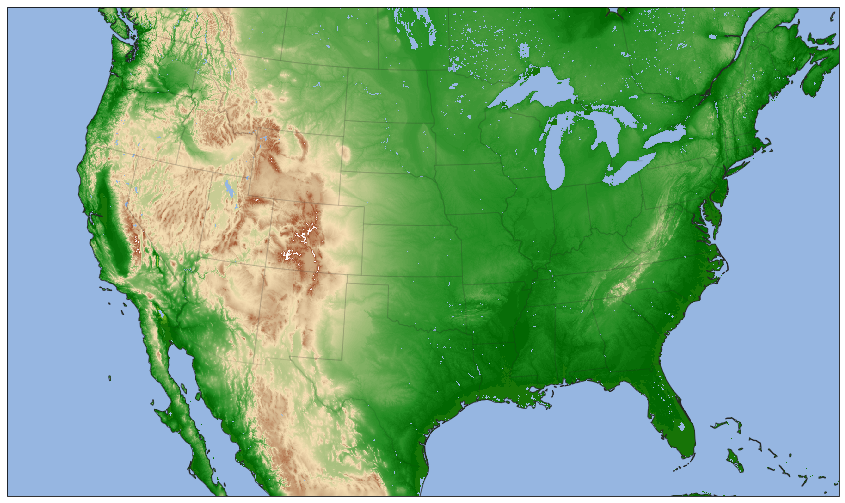

In [12]:
ax = common_features("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    **cm_terrain(water=True, water_threshold=-99).cmap_kwargs
)

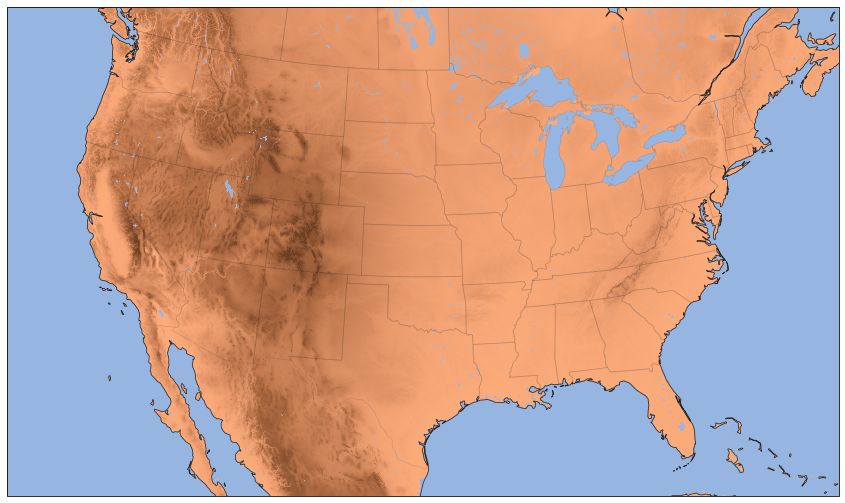

In [13]:
ax = common_features("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    **cm_terrain(water=True, land_color_scheme=2, water_threshold=-99).cmap_kwargs
)

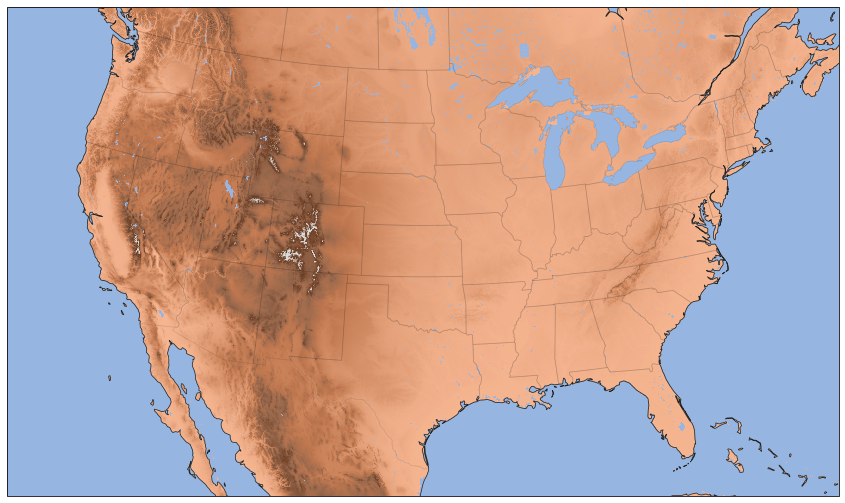

In [28]:
landcolor = [
    (0, "#f8b893"),
    (0.4, "#c0784f"),
    (0.6, "#97674c"),
    (0.85, "#6b3d22"),
    (1, "#dadada"),
]

ax = common_features("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    **cm_terrain(
        water=True, land_color_scheme=landcolor, water_threshold=-99
    ).cmap_kwargs
)

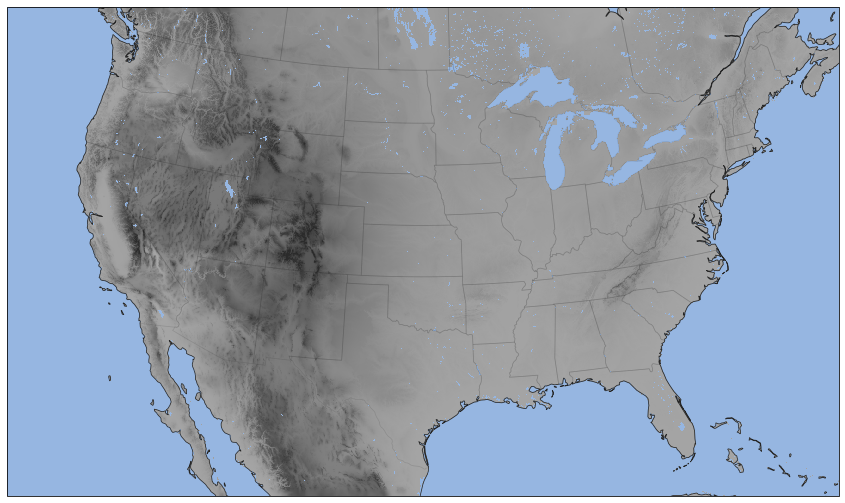

In [38]:
landcolor = [
    (0, "#a7a7a7"),
    (1, "#2b2b2b"),
]

ax = common_features("50m", figsize=[15, 9], crs=ds.herbie.crs).STATES().ax
ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.orog,
    transform=pc,
    **cm_terrain(
        water=True, land_color_scheme=landcolor, water_threshold=-99
    ).cmap_kwargs
)